### Introduction

I'll try to recover original sources from mixed signals. I'll make some statements about the mixture that you'll only be able to understand if take a look at `data/Create data.ipynb`

In [1]:
import numpy as np
import scipy.io
from statsmodels.sandbox.distributions.mv_measures import mutualinfo_kde, mutualinfo_binned
from sklearn.metrics import mutual_info_score
import scipy.stats as stats
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

from jade import jadeR

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
def read(n):
    x_100 = scipy.io.loadmat('data/X_%s_100.mat' % n)['X'].T
    x_1k = scipy.io.loadmat('data/X_%s_1000.mat' % n)['X'].T
    x_100k = scipy.io.loadmat('data/X_%s_100000.mat' % n)['X'].T
    assert ((x_100.shape[0] == x_1k.shape[0]) and (x_1k.shape[0] == x_100k.shape[0]))
    return x_100k, x_1k, x_100

def _f(m):
    '''Flat matrix'''
    return np.asarray(m).flatten()

def get_mi_matrix(signal, kde=False, n_bins=None):
    rows, cols = signal.shape
    mat = np.zeros((rows, rows))
    np.fill_diagonal(mat, 1)
    # Upper diagonal
    for r in range(rows):
        for c in range(r, rows):
            if r == c:
                continue
            p, q = _f(signal[r]), _f(signal[c])
            if kde:
                mi = mutualinfo_kde(p, q)
            else:
                if n_bins is None:
                    p_bins = len(np.histogram(p, bins='fd')[0])
                    q_bins = len(np.histogram(q, bins='fd')[0])
                    n_bins = min(p_bins, q_bins)
                mi = mutualinfo_binned(p, q, n_bins)[0]
            mat[r][c] = mi
            mat[c][r] = mi

    return mat

def _get_binomial(mean, variance, nobs):
    p = 1 - variance/mean
    n = mean/p
    try:
        return np.random.binomial(n, p, nobs)
    except:
        return None

def get_signals(desc):
     return [
        ('Gaussiana', np.random.normal(desc.mean, desc.variance, desc.nobs)),
        ('Laplace', np.random.laplace(desc.mean, desc.variance, desc.nobs)),
        ('Binomial', _get_binomial(desc.mean, desc.variance, desc.nobs)),
        ('Uniforme', np.random.uniform(desc.mean, desc.variance, desc.nobs)),
    ]

#### Run #01

In [6]:
x_100k, x_1k, x_100 = read('01')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


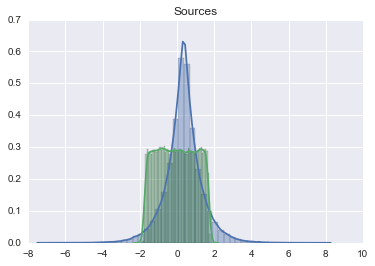

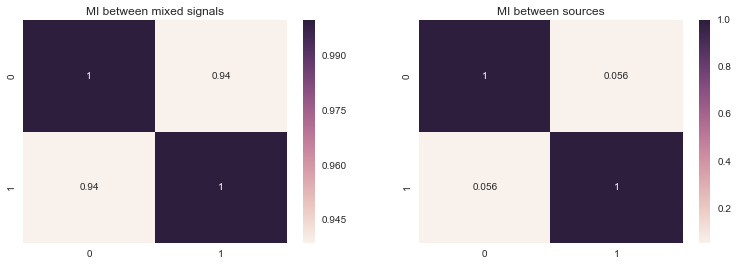

In [12]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


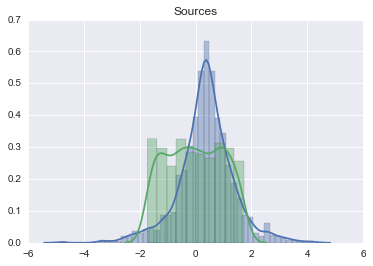

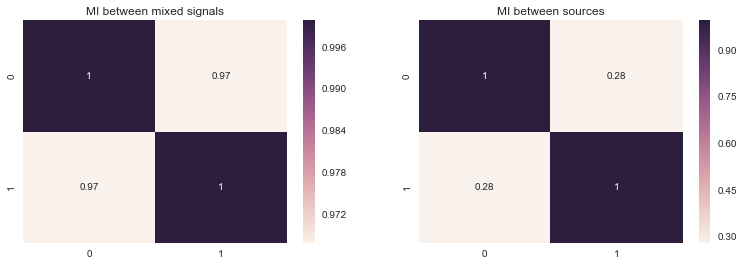

In [14]:
B = jadeR(x_1k)
S = B * np.matrix(x_1k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_1k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


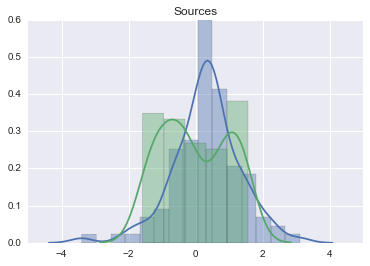

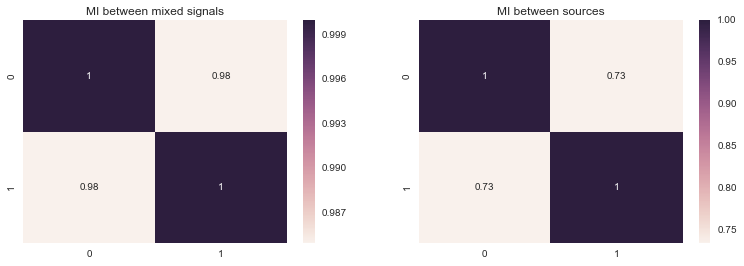

In [13]:
B = jadeR(x_100)
S = B * np.matrix(x_100)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

We can see how sources are indeed recovered, although separation performance is clearly worse when we're dealing with a small number of samples.

#### Run #02

In [15]:
x_100k, x_1k, x_100 = read('02')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


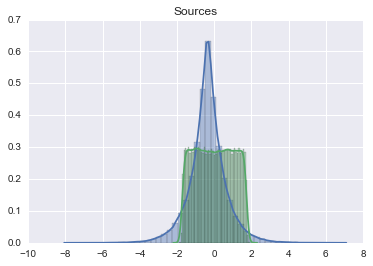

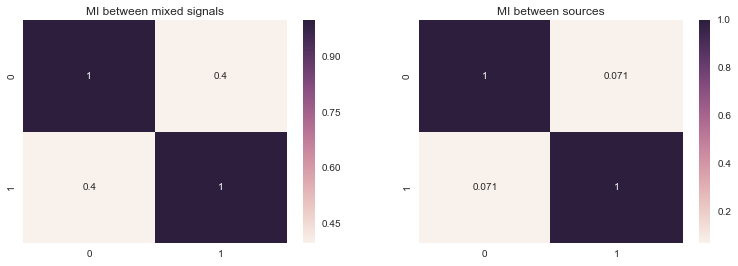

In [16]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Although the mixture matrix is ill-conditioned the separation apparently went well.

#### Run #03

In [17]:
x_100k, x_1k, x_100 = read('03')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


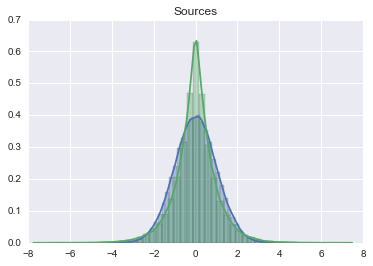

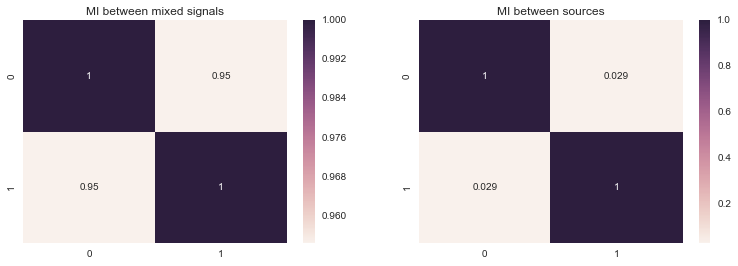

In [18]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

As expected, even with a Gaussian distribution separation went well.

#### Run #04

In [20]:
x_100k, x_1k, x_100 = read('04')

Number of iter: 13


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


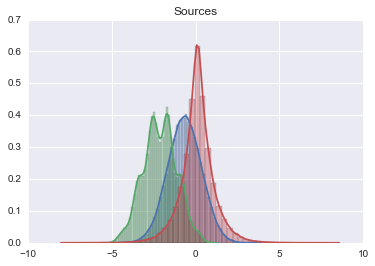

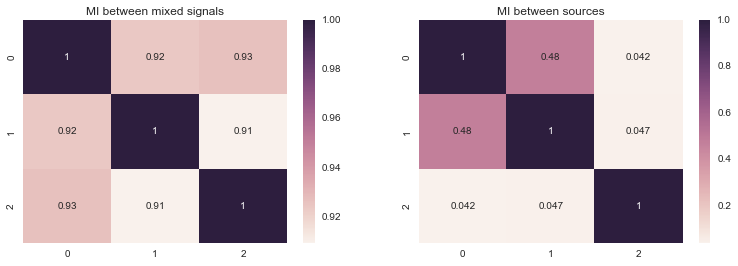

In [22]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]); sns.distplot(S[2]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Visually it seems Jade was able to recover original sources, although a more formal test is lacking.

#### Run #05

In [25]:
x_100k, x_1k, x_100 = read('05')

Number of iter: 104


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


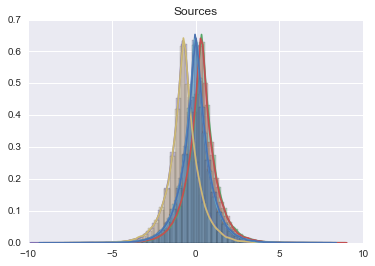

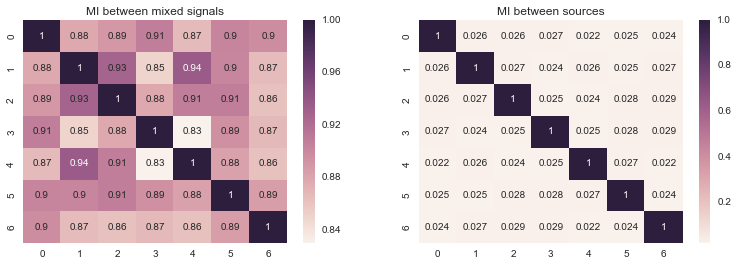

In [27]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]); sns.distplot(S[2]);
sns.distplot(S[3]); sns.distplot(S[4]); sns.distplot(S[5]); sns.distplot(S[6]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Even with more sources than usual Jade performed well and was able to recover original sources.

#### Run #06

In [29]:
x_100k, x_1k, x_100 = read('06')

Number of iter: 16


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


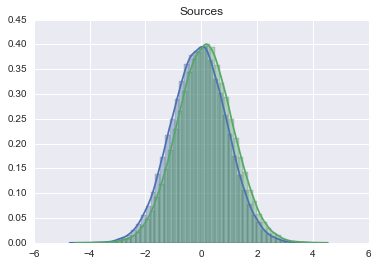

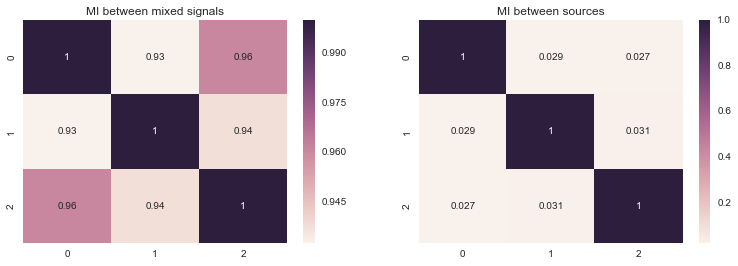

In [30]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

Analyzing visually it is not possible to say if the separation worked.

#### Run #07

In [31]:
x_100k, x_1k, x_100 = read('07')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


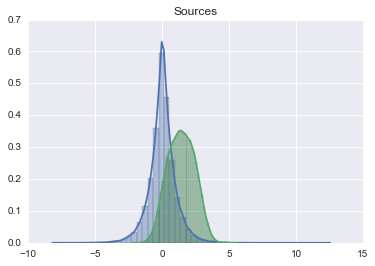

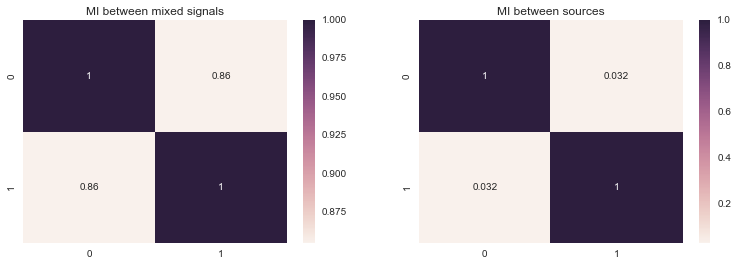

In [32]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

It seemed to have worked.

#### Run #08

In [33]:
x_100k, x_1k, x_100 = read('08')

This will only work with FOBI.

#### Run #09

In [49]:
x_100k, x_1k, x_100 = read('09')

Number of iter: 1


//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/sandbox/distributions/mv_measures.py:130: RuntimeWarning: divide by zero encountered in log
  mi_obs = pyx * (np.log(pyx+1e-10) - np.log(py)[:,None] - np.log(px))
//anaconda/envs/kaggle/lib/python3.5/site-packages/statsmodels/sandbox/distributions/mv_measures.py:130: RuntimeWarning: invalid value encountered in multiply
  mi_obs = pyx * (np.log(pyx+1e-10) - np.log(py)[:,None] - np.log(px))


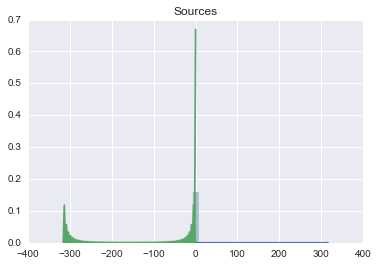

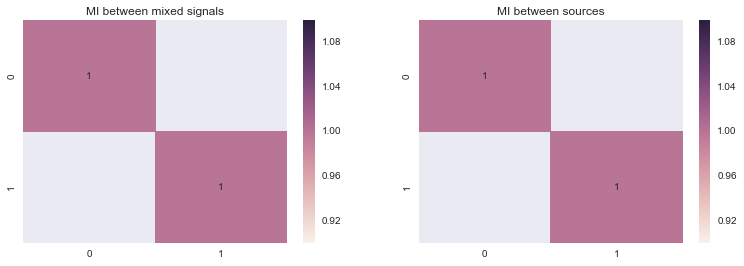

In [50]:
B = jadeR(x_100k)
S = B * np.matrix(x_100k)
ax = sns.distplot(S[0]); sns.distplot(S[1]);
ax.set_title('Sources')

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(x_100k, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

As expected, this didn't work.

### Conclusion

This notebook lacks of more rigorous analysis. I couldn't really tell if Jade recovered the correct distribution, ie, if it's Laplace, Uniform, ... The way of doing it is through hypothesis testing.